In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


subission_pd = pd.read_csv('submission6.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)
print('Sample shape:',subission_pd.shape)

l = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

Train shape: (20972, 9)
Test shape: (8989, 3)
Sample shape: (8989, 7)


In [5]:
test = test.drop(['ID'],axis=1)

X = train.loc[:,['TITLE','ABSTRACT']]
y = train.loc[:,l]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

y_test.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

y1 = np.array(y_train)
y2 = np.array(y_test)

(18874, 2) (2098, 2)
(18874, 6) (2098, 6)


In [6]:
#Removing Punctuations

X_train.replace('[^a-zA-Z]',' ', regex=True, inplace=True)
X_test.replace('[^a-zA-Z]',' ', regex=True, inplace=True)

test.replace('[^a-zA-Z]',' ', regex=True, inplace=True)

#Converting to lower case characters

for index in X_train.columns:
  X_train[index] = X_train[index].str.lower()

for index in X_test.columns:
  X_test[index] = X_test[index].str.lower()

for index in test.columns:
  test[index] = test[index].str.lower()

#Removing one letter words

X_train['ABSTRACT'] = X_train['ABSTRACT'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
X_test['ABSTRACT'] = X_test['ABSTRACT'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

test['ABSTRACT'] = test['ABSTRACT'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

#Removing multiple blank spaces

X_train = X_train.replace('\s+', ' ', regex=True)
X_test = X_test.replace('\s+', ' ', regex=True)

test = test.replace('\s+', ' ', regex=True)

In [7]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
# len(stop_words)
# X_train['ABSTRACT'] = X_train['ABSTRACT'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
# X_test['ABSTRACT'] = X_test['ABSTRACT'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

# test['ABSTRACT'] = test['ABSTRACT'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

X_train['combined'] = X_train['TITLE']+' '+X_train['ABSTRACT']
X_test['combined'] = X_test['TITLE']+' '+X_test['ABSTRACT']

test['combined'] = test['TITLE']+' '+test['ABSTRACT']

X_train = X_train.drop(['TITLE','ABSTRACT'],axis=1)
X_test = X_test.drop(['TITLE','ABSTRACT'],axis=1)

test = test.drop(['TITLE','ABSTRACT'],axis=1)

X_train.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,combined
13275,clustering in hilbert space of a quantum optim...
19273,graph heat mixture model learning graph infer...
6427,fast and unsupervised methods for multilingual...
19168,natasha faster non convex stochastic optimizat...
14148,kustaanheimo stiefel transformation with an ar...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('combined').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

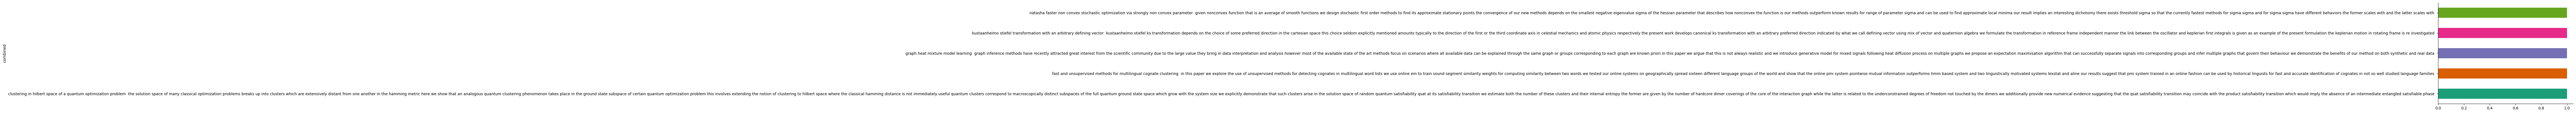

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('combined').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:

X_lines = []
for row in range(0,X.shape[0]):
  X_lines.append(' '.join(str(x) for x in X.iloc[row,:]))

In [10]:
train_lines = []
for row in range(0,X_train.shape[0]):
  train_lines.append(' '.join(str(x) for x in X_train.iloc[row,:]))

test_lines = []
for row in range(0,X_test.shape[0]):
  test_lines.append(' '.join(str(x) for x in X_test.iloc[row,:]))

predtest_lines = []
for row in range(0,test.shape[0]):
  predtest_lines.append(' '.join(str(x) for x in test.iloc[row,:]))

In [11]:
len(train_lines)

18874

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer(ngram_range=(1,2))
X_train_cv = countvector.fit_transform(train_lines)
X_test_cv = countvector.transform(test_lines)

test_cv = countvector.transform(predtest_lines)

#Using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

tfidfvector = TfidfTransformer()
X_train_tf = tfidfvector.fit_transform(X_train_cv)
X_test_tf = tfidfvector.fit_transform(X_test_cv)

test_tf = tfidfvector.fit_transform(test_cv)

X_cv = countvector.transform(X_lines)

X_tf = tfidfvector.fit_transform(X_cv) #x_tf,y

In [14]:
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier

model = LinearSVC(C=0.5, class_weight='balanced', random_state=42)
models = MultiOutputClassifier(model)

models.fit(X_train_tf, y1)

MultiOutputClassifier(estimator=LinearSVC(C=0.5, class_weight='balanced',
                                          random_state=42))

In [15]:
preds = models.predict(X_test_tf)
preds


array([[1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#print(confusion_matrix(y2,preds))
print(classification_report(y2,preds))

print("Accuracy:")
print(accuracy_score(y2,preds))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       853
           1       0.88      0.89      0.88       623
           2       0.84      0.84      0.84       580
           3       0.72      0.86      0.78       516
           4       0.53      0.40      0.46        58
           5       0.86      0.69      0.77        26

   micro avg       0.81      0.86      0.83      2656
   macro avg       0.77      0.76      0.76      2656
weighted avg       0.81      0.86      0.83      2656
 samples avg       0.84      0.89      0.84      2656

Accuracy:
0.6611058150619638


In [ ]:
# for i in range(100):
#     print(str(y2[i])+str(preds[i]))

In [17]:
predssv = models.predict(test_tf)
predssv

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [18]:
test = pd.read_csv('test.csv')

submit = pd.DataFrame({'ID': test.ID, 'Computer Science': predssv[:,0],'Physics':predssv[:,1],
                       'Mathematics':predssv[:,2],'Statistics':predssv[:,3],'Quantitative Biology':predssv[:,4],
                       'Quantitative Finance':predssv[:,5]})
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
submit.to_csv('submission2.csv', index=False)